In [1]:
import pandas as pd
import numpy as np
from shapely.wkt import loads
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from SimuSamp.new_funcs.load.SpatDat import SpatDat

In [2]:
sampleids = ["01_F", "01_G", "02_G", "02_H", "03_B", "03_H", "04_I", "04_N", "05_G", "05_I", "06_H", "07_K", "08_J", "09_E", "10_B", "11_E", "11_F", "12_M", "13_G", "14_I", "15_G", "16_B", "17_I", "18_E", "19_F", "21_I", "22_N", "23_B", "24_I", "25_M", "26_I", "27_H", "28_FSC", "29_L", "30_D"]
microns_per_pixel=0.22715
mm2_per_pixels2 = (microns_per_pixel / 1000) ** 2

font_dict = {"fontsize": 12, "fontweight": "bold", "fontname": "Arial"}

In [3]:
ws = pd.read_excel("../../../../Data/WS_stats.xlsx")

In [4]:
ws = ws.rename(columns={"sample": "sampleid", "annotation": "region", "density": "ws_density", "n_neighbour": "ws_n_neighbour"})

ws = ws[ws["region"].isin(["tumour", "outer_IM"])].reset_index(drop=True)

In [5]:
tma = pd.read_excel("../../../../Data/Simulated/simulation_results.xlsx")

In [6]:
tma["region"] = tma["region"].replace({"IM": "outer_IM"})

In [7]:
tma_total = tma.merge(ws[["sampleid", "region", "ws_density", "ws_n_neighbour"]], on=["sampleid", "region"], how="left")

tma_total["den_error"] = abs(tma_total["density_mean"] - tma_total["ws_density"]) / tma_total["ws_density"]

tma_total["nn_error"] = abs(tma_total["nearest_neighbour_mean"] - tma_total["ws_n_neighbour"]) / tma_total["ws_n_neighbour"]

In [8]:
tum_600 = tma_total[(tma_total["region"] == "tumour") & (tma_total["core_radius"] == 0.3)].reset_index(drop=True)
tum_1000 = tma_total[(tma_total["region"] == "tumour") & (tma_total["core_radius"] == 0.5)].reset_index(drop=True)
tum_2000 = tma_total[(tma_total["region"] == "tumour") & (tma_total["core_radius"] == 1.0)].reset_index(drop=True)

im_600 = tma_total[(tma_total["region"] == "outer_IM") & (tma_total["core_radius"] == 0.3)].reset_index(drop=True)
im_1000 = tma_total[(tma_total["region"] == "outer_IM") & (tma_total["core_radius"] == 0.5)].reset_index(drop=True)
im_2000 = tma_total[(tma_total["region"] == "outer_IM") & (tma_total["core_radius"] == 1.0)].reset_index(drop=True)

### Mean Density Std

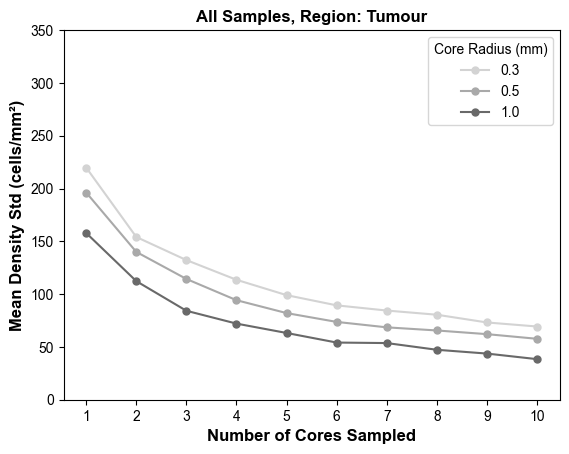

In [9]:
plot_data_600 = tum_600.groupby(["sampleid", "n_sampled"])["density_mean"].std().reset_index().groupby("n_sampled")["density_mean"].mean()
plot_data_1000 = tum_1000.groupby(["sampleid", "n_sampled"])["density_mean"].std().reset_index().groupby("n_sampled")["density_mean"].mean()
plot_data_2000 = tum_2000.groupby(["sampleid", "n_sampled"])["density_mean"].std().reset_index().groupby("n_sampled")["density_mean"].mean()

plt.plot(plot_data_600.index, plot_data_600, label="0.3", color="lightgrey", marker="o", markersize=5)
plt.plot(plot_data_1000.index, plot_data_1000, label="0.5", color="darkgrey", marker="o", markersize=5)
plt.plot(plot_data_2000.index, plot_data_2000, label="1.0", color="dimgrey", marker="o", markersize=5)

plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
plt.ylabel("Mean Density Std (cells/mm\u00b2)", fontdict=font_dict)

plt.xticks(np.arange(1, 11), fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)

plt.ylim(0, 350)

plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

# plt.axhline(20, color="red", linestyle="--")

plt.title(f"All Samples, Region: Tumour", fontdict=font_dict)

plt.savefig(f"../../../../Data/Plots/DensityError/PerSampleLine/allsamples_tumour_meandenstd.png", dpi=300, transparent=True)

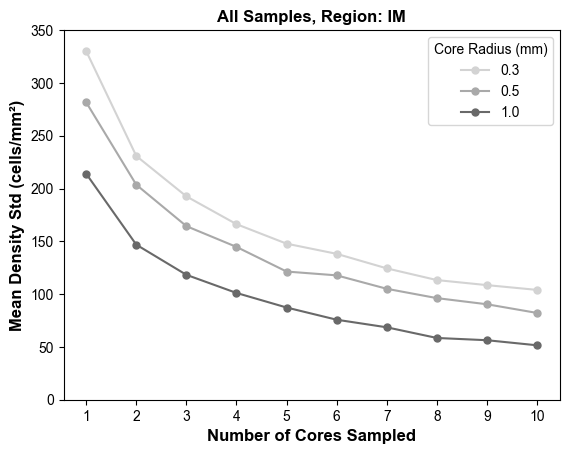

In [10]:
plot_data_600 = im_600.groupby(["sampleid", "n_sampled"])["density_mean"].std().reset_index().groupby("n_sampled")["density_mean"].mean()
plot_data_1000 = im_1000.groupby(["sampleid", "n_sampled"])["density_mean"].std().reset_index().groupby("n_sampled")["density_mean"].mean()
plot_data_2000 = im_2000.groupby(["sampleid", "n_sampled"])["density_mean"].std().reset_index().groupby("n_sampled")["density_mean"].mean()

plt.plot(plot_data_600.index, plot_data_600, label="0.3", color="lightgrey", marker="o", markersize=5)
plt.plot(plot_data_1000.index, plot_data_1000, label="0.5", color="darkgrey", marker="o", markersize=5)
plt.plot(plot_data_2000.index, plot_data_2000, label="1.0", color="dimgrey", marker="o", markersize=5)

plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
plt.ylabel("Mean Density Std (cells/mm\u00b2)", fontdict=font_dict)

plt.xticks(np.arange(1, 11), fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)

plt.ylim(0, 350)

plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

# plt.axhline(20, color="red", linestyle="--")

plt.title(f"All Samples, Region: IM", fontdict=font_dict)

plt.savefig(f"../../../../Data/Plots/DensityError/PerSampleLine/allsamples_IM_meandenstd.png", dpi=300, transparent=True)

### Coefficient of Variation

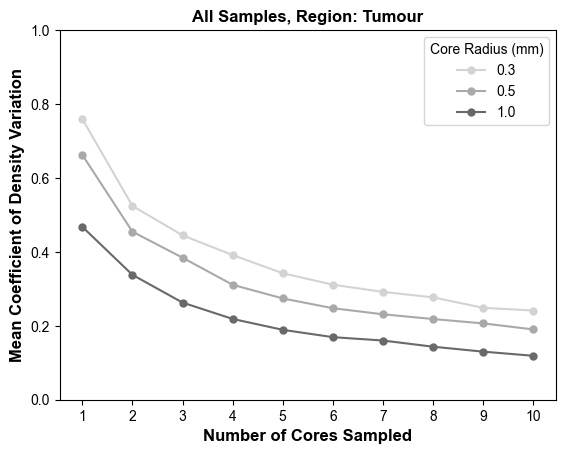

In [11]:
plot_data_600 = tum_600.groupby(["sampleid", "n_sampled"])["density_mean"].agg(mean_density="mean", std_density="std").reset_index()
plot_data_1000 = tum_1000.groupby(["sampleid", "n_sampled"])["density_mean"].agg(mean_density="mean", std_density="std").reset_index()
plot_data_2000 = tum_2000.groupby(["sampleid", "n_sampled"])["density_mean"].agg(mean_density="mean", std_density="std").reset_index()

plot_data_600["cv_density"] = plot_data_600["std_density"] / plot_data_600["mean_density"]
plot_data_1000["cv_density"] = plot_data_1000["std_density"] / plot_data_1000["mean_density"]
plot_data_2000["cv_density"] = plot_data_2000["std_density"] / plot_data_2000["mean_density"]

plot_data_600 = plot_data_600.groupby("n_sampled")["cv_density"].mean().reset_index()
plot_data_1000 = plot_data_1000.groupby("n_sampled")["cv_density"].mean().reset_index()
plot_data_2000 = plot_data_2000.groupby("n_sampled")["cv_density"].mean().reset_index()

plt.plot(plot_data_600["n_sampled"], plot_data_600["cv_density"], label="0.3", color="lightgrey", marker="o", markersize=5)
plt.plot(plot_data_1000["n_sampled"], plot_data_1000["cv_density"], label="0.5", color="darkgrey", marker="o", markersize=5)
plt.plot(plot_data_2000["n_sampled"], plot_data_2000["cv_density"], label="1.0", color="dimgrey", marker="o", markersize=5)

plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
plt.ylabel("Mean Coefficient of Density Variation", fontdict=font_dict)

plt.xticks(np.arange(1, 11), fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)

plt.ylim(0, 1)

plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

# plt.axhline(20, color="red", linestyle="--")

plt.title(f"All Samples, Region: Tumour", fontdict=font_dict)

plt.savefig(f"../../../../Data/Plots/DensityError/PerSampleLine/allsamples_tumour_meandencv.png", dpi=300, transparent=True)

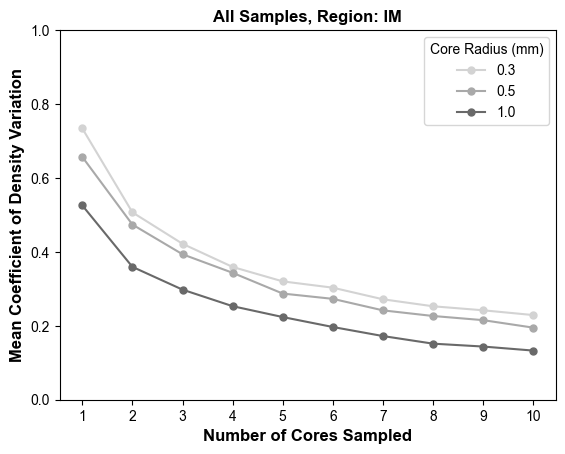

In [12]:
plot_data_600 = im_600.groupby(["sampleid", "n_sampled"])["density_mean"].agg(mean_density="mean", std_density="std").reset_index()
plot_data_1000 = im_1000.groupby(["sampleid", "n_sampled"])["density_mean"].agg(mean_density="mean", std_density="std").reset_index()
plot_data_2000 = im_2000.groupby(["sampleid", "n_sampled"])["density_mean"].agg(mean_density="mean", std_density="std").reset_index()

plot_data_600["cv_density"] = plot_data_600["std_density"] / plot_data_600["mean_density"]
plot_data_1000["cv_density"] = plot_data_1000["std_density"] / plot_data_1000["mean_density"]
plot_data_2000["cv_density"] = plot_data_2000["std_density"] / plot_data_2000["mean_density"]

plot_data_600 = plot_data_600.groupby("n_sampled")["cv_density"].mean().reset_index()
plot_data_1000 = plot_data_1000.groupby("n_sampled")["cv_density"].mean().reset_index()
plot_data_2000 = plot_data_2000.groupby("n_sampled")["cv_density"].mean().reset_index()

plt.plot(plot_data_600["n_sampled"], plot_data_600["cv_density"], label="0.3", color="lightgrey", marker="o", markersize=5)
plt.plot(plot_data_1000["n_sampled"], plot_data_1000["cv_density"], label="0.5", color="darkgrey", marker="o", markersize=5)
plt.plot(plot_data_2000["n_sampled"], plot_data_2000["cv_density"], label="1.0", color="dimgrey", marker="o", markersize=5)

plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
plt.ylabel("Mean Coefficient of Density Variation", fontdict=font_dict)

plt.xticks(np.arange(1, 11), fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)

plt.ylim(0, 1)

plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

# plt.axhline(20, color="red", linestyle="--")

plt.title(f"All Samples, Region: IM", fontdict=font_dict)

plt.savefig(f"../../../../Data/Plots/DensityError/PerSampleLine/allsamples_IM_meandencv.png", dpi=300, transparent=True)

### Mean Density Error

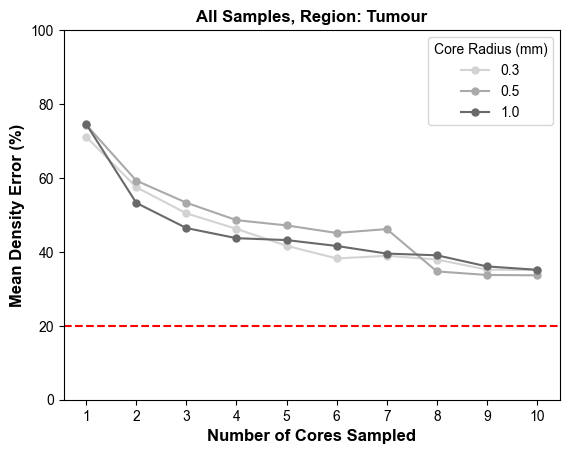

In [13]:

plot_data_600 = tum_600.groupby(["sampleid", "n_sampled"])["den_error"].mean().reset_index().groupby("n_sampled")["den_error"].mean()
plot_data_1000 = tum_1000.groupby(["sampleid", "n_sampled"])["den_error"].mean().reset_index().groupby("n_sampled")["den_error"].mean()
plot_data_2000 = tum_2000.groupby(["sampleid", "n_sampled"])["den_error"].mean().reset_index().groupby("n_sampled")["den_error"].mean()

plt.plot(plot_data_600.index, plot_data_600 * 100, label="0.3", color="lightgrey", marker="o", markersize=5)
plt.plot(plot_data_1000.index, plot_data_1000 * 100, label="0.5", color="darkgrey", marker="o", markersize=5)
plt.plot(plot_data_2000.index, plot_data_2000 * 100, label="1.0", color="dimgrey", marker="o", markersize=5)

plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
plt.ylabel("Mean Density Error (%)", fontdict=font_dict)

plt.xticks(np.arange(1, 11), fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)

plt.ylim(0, 100)

plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

plt.axhline(20, color="red", linestyle="--")

plt.title(f"All Samples, Region: Tumour", fontdict=font_dict)

plt.savefig(f"../../../../Data/Plots/DensityError/PerSampleLine/allsamples_tumour_meandenerror.png", dpi=300, transparent=True)

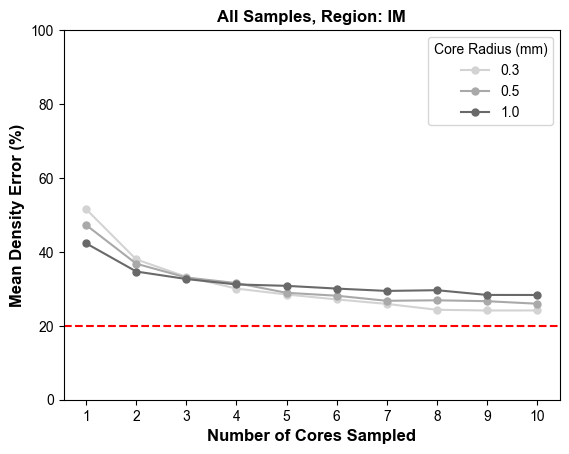

In [14]:
plot_data_600 = im_600.groupby(["sampleid", "n_sampled"])["den_error"].mean().reset_index().groupby("n_sampled")["den_error"].mean()
plot_data_1000 = im_1000.groupby(["sampleid", "n_sampled"])["den_error"].mean().reset_index().groupby("n_sampled")["den_error"].mean()
plot_data_2000 = im_2000.groupby(["sampleid", "n_sampled"])["den_error"].mean().reset_index().groupby("n_sampled")["den_error"].mean()

plt.plot(plot_data_600.index, plot_data_600 * 100, label="0.3", color="lightgrey", marker="o", markersize=5)
plt.plot(plot_data_1000.index, plot_data_1000 * 100, label="0.5", color="darkgrey", marker="o", markersize=5)
plt.plot(plot_data_2000.index, plot_data_2000 * 100, label="1.0", color="dimgrey", marker="o", markersize=5)

plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
plt.ylabel("Mean Density Error (%)", fontdict=font_dict)

plt.xticks(np.arange(1, 11), fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)

plt.ylim(0, 100)

plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

plt.axhline(20, color="red", linestyle="--")

plt.title(f"All Samples, Region: IM", fontdict=font_dict)

plt.savefig(f"../../../../Data/Plots/DensityError/PerSampleLine/allsamples_IM_meandenerror.png", dpi=300, transparent=True)

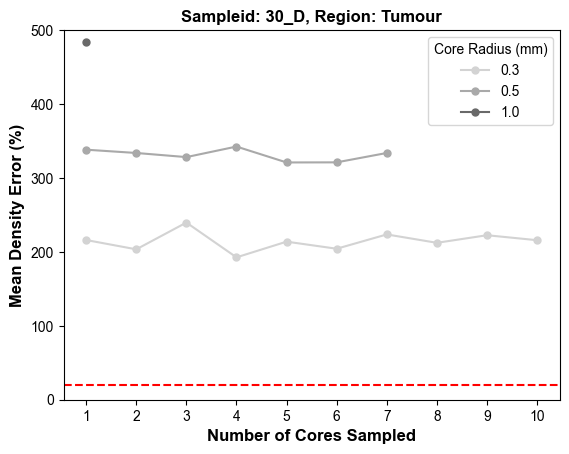

In [15]:
for sampleid in sampleids:
    plt.cla()
    plt.clf()
    
    plot_data_600 = tum_600[tum_600["sampleid"] == sampleid].groupby("n_sampled")["den_error"].mean()
    plot_data_1000 = tum_1000[tum_1000["sampleid"] == sampleid].groupby("n_sampled")["den_error"].mean()
    plot_data_2000 = tum_2000[tum_2000["sampleid"] == sampleid].groupby("n_sampled")["den_error"].mean()

    plt.plot(plot_data_600.index, plot_data_600 * 100, label="0.3", color="lightgrey", marker="o", markersize=5)
    plt.plot(plot_data_1000.index, plot_data_1000 * 100, label="0.5", color="darkgrey", marker="o", markersize=5)
    plt.plot(plot_data_2000.index, plot_data_2000 * 100, label="1.0", color="dimgrey", marker="o", markersize=5)

    plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
    plt.ylabel("Mean Density Error (%)", fontdict=font_dict)

    plt.xticks(np.arange(1, 11), fontsize=10, fontname="Arial")
    plt.yticks(fontsize=10, fontname="Arial")

    # plt.gca().spines["top"].set_visible(False)
    # plt.gca().spines["right"].set_visible(False)

    if sampleid in ["03_B", "30_D"]:
        plt.ylim(0, 500)
    else:
        plt.ylim(0, 200)

    plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

    plt.axhline(20, color="red", linestyle="--")

    plt.title(f"Sampleid: {sampleid}, Region: Tumour", fontdict=font_dict)

    plt.savefig(f"../../../../Data/Plots/DensityError/PerSampleLine/{sampleid}_tumour_meandenerror.png", dpi=300, transparent=True)

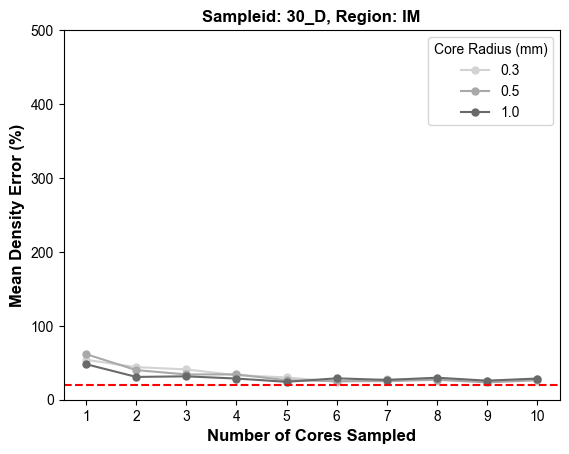

In [16]:
for sampleid in sampleids:
    plt.cla()
    plt.clf()
    
    plot_data_600 = im_600[im_600["sampleid"] == sampleid].groupby("n_sampled")["den_error"].mean()
    plot_data_1000 = im_1000[im_1000["sampleid"] == sampleid].groupby("n_sampled")["den_error"].mean()
    plot_data_2000 = im_2000[im_2000["sampleid"] == sampleid].groupby("n_sampled")["den_error"].mean()

    plt.plot(plot_data_600.index, plot_data_600 * 100, label="0.3", color="lightgrey", marker="o", markersize=5)
    plt.plot(plot_data_1000.index, plot_data_1000 * 100, label="0.5", color="darkgrey", marker="o", markersize=5)
    plt.plot(plot_data_2000.index, plot_data_2000 * 100, label="1.0", color="dimgrey", marker="o", markersize=5)

    plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
    plt.ylabel("Mean Density Error (%)", fontdict=font_dict)

    plt.xticks(np.arange(1, 11), fontsize=10, fontname="Arial")
    plt.yticks(fontsize=10, fontname="Arial")

    # plt.gca().spines["top"].set_visible(False)
    # plt.gca().spines["right"].set_visible(False)

    if sampleid in ["03_B", "30_D"]:
        plt.ylim(0, 500)
    else:
        plt.ylim(0, 200)

    plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

    plt.axhline(20, color="red", linestyle="--")

    plt.title(f"Sampleid: {sampleid}, Region: IM", fontdict=font_dict)

    plt.savefig(f"../../../../Data/Plots/DensityError/PerSampleLine/{sampleid}_IM_meandenerror.png", dpi=300, transparent=True)

### Mean Nearest Neighbour Distance Error

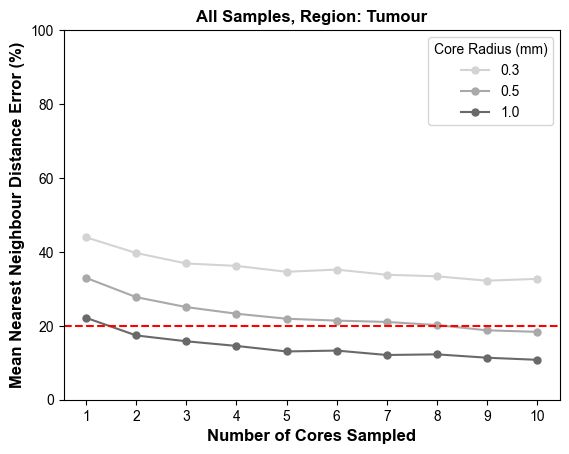

In [17]:
plot_data_600 = tum_600.groupby(["sampleid", "n_sampled"])["nn_error"].mean().reset_index().groupby("n_sampled")["nn_error"].mean()
plot_data_1000 = tum_1000.groupby(["sampleid", "n_sampled"])["nn_error"].mean().reset_index().groupby("n_sampled")["nn_error"].mean()
plot_data_2000 = tum_2000.groupby(["sampleid", "n_sampled"])["nn_error"].mean().reset_index().groupby("n_sampled")["nn_error"].mean()

plt.plot(plot_data_600.index, plot_data_600 * 100, label="0.3", color="lightgrey", marker="o", markersize=5)
plt.plot(plot_data_1000.index, plot_data_1000 * 100, label="0.5", color="darkgrey", marker="o", markersize=5)
plt.plot(plot_data_2000.index, plot_data_2000 * 100, label="1.0", color="dimgrey", marker="o", markersize=5)

plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
plt.ylabel("Mean Nearest Neighbour Distance Error (%)", fontdict=font_dict)

plt.xticks(np.arange(1, 11), fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)

plt.ylim(0, 100)

plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

plt.axhline(20, color="red", linestyle="--")

plt.title(f"All Samples, Region: Tumour", fontdict=font_dict)

plt.savefig(f"../../../../Data/Plots/NNError/PerSampleLine/allsamples_tumour_meanNNerror.png", dpi=300, transparent=True)

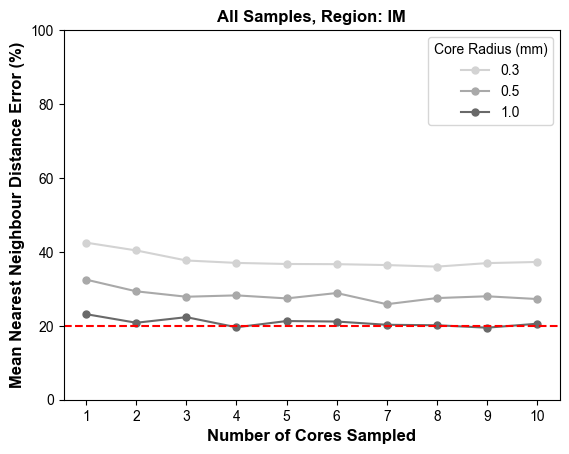

In [18]:
plot_data_600 = im_600.groupby(["sampleid", "n_sampled"])["nn_error"].mean().reset_index().groupby("n_sampled")["nn_error"].mean()
plot_data_1000 = im_1000.groupby(["sampleid", "n_sampled"])["nn_error"].mean().reset_index().groupby("n_sampled")["nn_error"].mean()
plot_data_2000 = im_2000.groupby(["sampleid", "n_sampled"])["nn_error"].mean().reset_index().groupby("n_sampled")["nn_error"].mean()

plt.plot(plot_data_600.index, plot_data_600 * 100, label="0.3", color="lightgrey", marker="o", markersize=5)
plt.plot(plot_data_1000.index, plot_data_1000 * 100, label="0.5", color="darkgrey", marker="o", markersize=5)
plt.plot(plot_data_2000.index, plot_data_2000 * 100, label="1.0", color="dimgrey", marker="o", markersize=5)

plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
plt.ylabel("Mean Nearest Neighbour Distance Error (%)", fontdict=font_dict)

plt.xticks(np.arange(1, 11), fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)

plt.ylim(0, 100)

plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

plt.axhline(20, color="red", linestyle="--")

plt.title(f"All Samples, Region: IM", fontdict=font_dict)

plt.savefig(f"../../../../Data/Plots/NNError/PerSampleLine/allsamples_IM_meanNNerror.png", dpi=300, transparent=True)

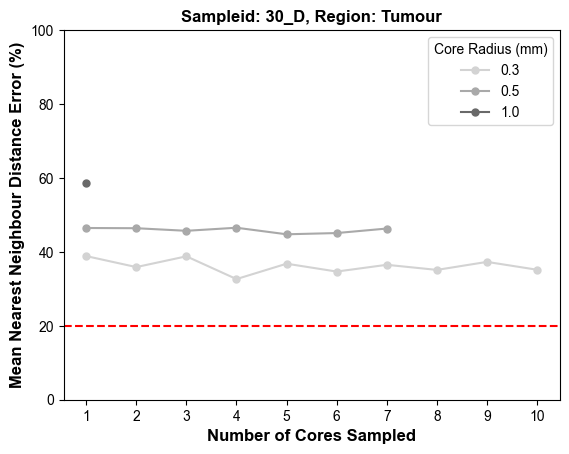

In [19]:
for sampleid in sampleids:
    plt.cla()
    plt.clf()
    
    plot_data_600 = tum_600[tum_600["sampleid"] == sampleid].groupby("n_sampled")["nn_error"].mean()
    plot_data_1000 = tum_1000[tum_1000["sampleid"] == sampleid].groupby("n_sampled")["nn_error"].mean()
    plot_data_2000 = tum_2000[tum_2000["sampleid"] == sampleid].groupby("n_sampled")["nn_error"].mean()

    plt.plot(plot_data_600.index, plot_data_600 * 100, label="0.3", color="lightgrey", marker="o", markersize=5)
    plt.plot(plot_data_1000.index, plot_data_1000 * 100, label="0.5", color="darkgrey", marker="o", markersize=5)
    plt.plot(plot_data_2000.index, plot_data_2000 * 100, label="1.0", color="dimgrey", marker="o", markersize=5)

    plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
    plt.ylabel("Mean Nearest Neighbour Distance Error (%)", fontdict=font_dict)

    plt.xticks(np.arange(1, 11), fontsize=10, fontname="Arial")
    plt.yticks(fontsize=10, fontname="Arial")

    # plt.gca().spines["top"].set_visible(False)
    # plt.gca().spines["right"].set_visible(False)

    plt.ylim(0, 100)

    plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

    plt.axhline(20, color="red", linestyle="--")

    plt.title(f"Sampleid: {sampleid}, Region: Tumour", fontdict=font_dict)

    plt.savefig(f"../../../../Data/Plots/NNError/PerSampleLine/{sampleid}_tumour_meanNNerror.png", dpi=300, transparent=True)

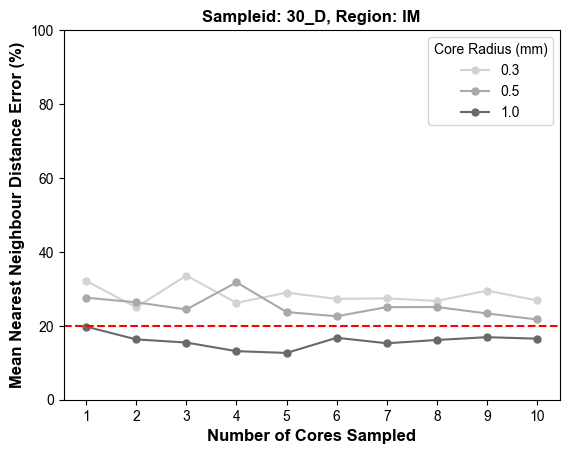

In [20]:
for sampleid in sampleids:
    plt.cla()
    plt.clf()
    
    plot_data_600 = im_600[im_600["sampleid"] == sampleid].groupby("n_sampled")["nn_error"].mean()
    plot_data_1000 = im_1000[im_1000["sampleid"] == sampleid].groupby("n_sampled")["nn_error"].mean()
    plot_data_2000 = im_2000[im_2000["sampleid"] == sampleid].groupby("n_sampled")["nn_error"].mean()

    plt.plot(plot_data_600.index, plot_data_600 * 100, label="0.3", color="lightgrey", marker="o", markersize=5)
    plt.plot(plot_data_1000.index, plot_data_1000 * 100, label="0.5", color="darkgrey", marker="o", markersize=5)
    plt.plot(plot_data_2000.index, plot_data_2000 * 100, label="1.0", color="dimgrey", marker="o", markersize=5)

    plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
    plt.ylabel("Mean Nearest Neighbour Distance Error (%)", fontdict=font_dict)

    plt.xticks(np.arange(1, 11), fontsize=10, fontname="Arial")
    plt.yticks(fontsize=10, fontname="Arial")

    # plt.gca().spines["top"].set_visible(False)
    # plt.gca().spines["right"].set_visible(False)

    plt.ylim(0, 100)

    plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

    plt.axhline(20, color="red", linestyle="--")

    plt.title(f"Sampleid: {sampleid}, Region: IM", fontdict=font_dict)

    plt.savefig(f"../../../../Data/Plots/NNError/PerSampleLine/{sampleid}_IM_meanNNerror.png", dpi=300, transparent=True)

## Boxplots

### Density Error

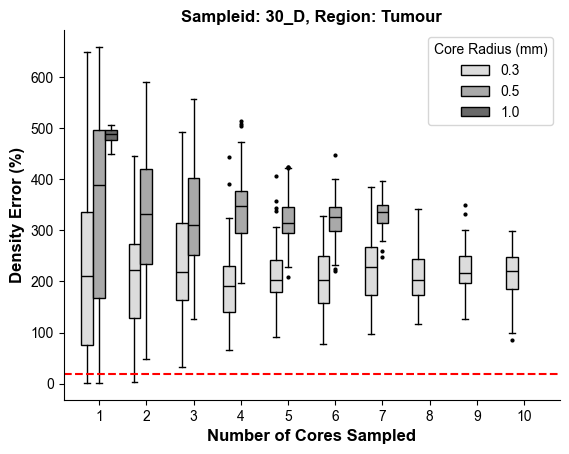

In [21]:
offset = 0.25
width = 0.25

positions = np.arange(1, 11)

for sampleid in sampleids:

    plt.cla()
    plt.clf()

    data_600 = [tum_600[(tum_600["sampleid"] == sampleid) & (tum_600["n_sampled"] == n)]["den_error"].values * 100 for n in positions]

    data_1000 = [tum_1000[(tum_1000["sampleid"] == sampleid) & (tum_1000["n_sampled"] == n)]["den_error"].values * 100 for n in positions]

    data_2000 = [tum_2000[(tum_2000["sampleid"] == sampleid) & (tum_2000["n_sampled"] == n)]["den_error"].values * 100 for n in positions]


    plt.boxplot(data_600, positions=[p - offset for p in positions], widths=width, label=0.3, flierprops=dict(marker="o", markerfacecolor="black", markersize=2, linestyle="none"), patch_artist=True, boxprops=dict(facecolor="gainsboro"), medianprops=dict(color="black"))

    plt.boxplot(data_1000, positions=positions, widths=width, label=0.5, flierprops=dict(marker="o", markerfacecolor="black", markersize=2, linestyle="none"), patch_artist=True, boxprops=dict(facecolor="darkgrey"), medianprops=dict(color="black"))

    plt.boxplot(data_2000, positions=[p + offset for p in positions], widths=width, label=1.0, flierprops=dict(marker="o", markerfacecolor="black", markersize=2, linestyle="none"), patch_artist=True, boxprops=dict(facecolor="dimgrey"), medianprops=dict(color="black"))

    plt.xticks(positions, positions, fontsize=10, fontname="Arial")
    plt.yticks(fontsize=10, fontname="Arial")

    plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
    plt.ylabel("Density Error (%)", fontdict=font_dict)

    plt.axhline(20, color="red", linestyle="--")

    plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    plt.title(f"Sampleid: {sampleid}, Region: Tumour", fontdict=font_dict)

    plt.savefig(f"../../../../Data/Plots/DensityError/PerSampleBox/{sampleid}_tumour_denerror.png", dpi=300, transparent=True)

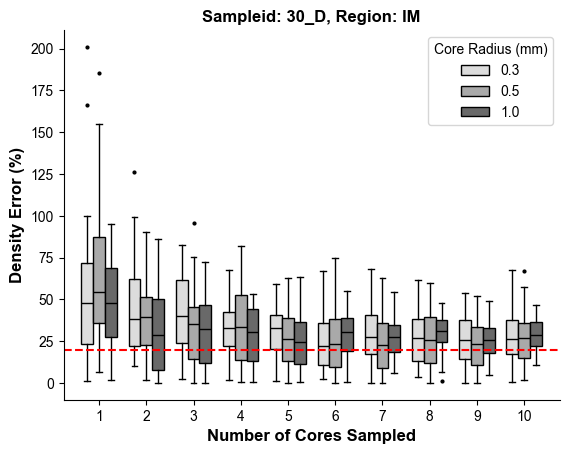

In [22]:
offset = 0.25
width = 0.25

positions = np.arange(1, 11)

for sampleid in sampleids:

    plt.cla()
    plt.clf()

    data_600 = [im_600[(im_600["sampleid"] == sampleid) & (im_600["n_sampled"] == n)]["den_error"].values * 100 for n in positions]

    data_1000 = [im_1000[(im_1000["sampleid"] == sampleid) & (im_1000["n_sampled"] == n)]["den_error"].values * 100 for n in positions]

    data_2000 = [im_2000[(im_2000["sampleid"] == sampleid) & (im_2000["n_sampled"] == n)]["den_error"].values * 100 for n in positions]


    plt.boxplot(data_600, positions=[p - offset for p in positions], widths=width, label=0.3, flierprops=dict(marker="o", markerfacecolor="black", markersize=2, linestyle="none"), patch_artist=True, boxprops=dict(facecolor="gainsboro"), medianprops=dict(color="black"))
    
    plt.boxplot(data_1000, positions=positions, widths=width, label=0.5, flierprops=dict(marker="o", markerfacecolor="black", markersize=2, linestyle="none"), patch_artist=True, boxprops=dict(facecolor="darkgrey"), medianprops=dict(color="black"))

    plt.boxplot(data_2000, positions=[p + offset for p in positions], widths=width, label=1.0, flierprops=dict(marker="o", markerfacecolor="black", markersize=2, linestyle="none"), patch_artist=True, boxprops=dict(facecolor="dimgrey"), medianprops=dict(color="black"))

    plt.xticks(positions, positions, fontsize=10, fontname="Arial")
    plt.yticks(fontsize=10, fontname="Arial")

    plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
    plt.ylabel("Density Error (%)", fontdict=font_dict)

    plt.axhline(20, color="red", linestyle="--")
    
    plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    plt.title(f"Sampleid: {sampleid}, Region: IM", fontdict=font_dict)

    plt.savefig(f"../../../../Data/Plots/DensityError/PerSampleBox/{sampleid}_IM_denerror.png", dpi=300, transparent=True)

### Density

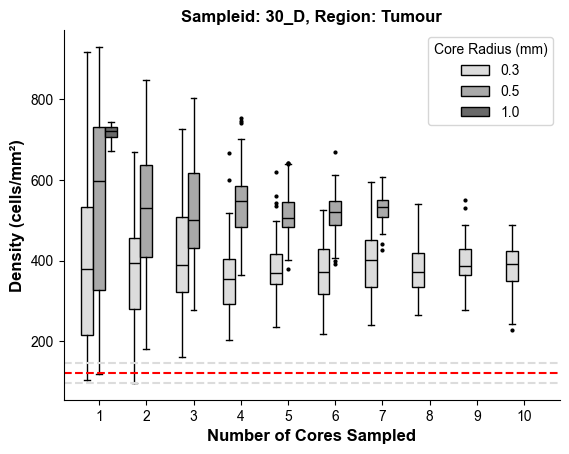

In [23]:
offset = 0.25
width = 0.25

positions = np.arange(1, 11)

for sampleid in sampleids:

    plt.cla()
    plt.clf()

    data_600 = [tum_600[(tum_600["sampleid"] == sampleid) & (tum_600["n_sampled"] == n)]["density_mean"].values for n in positions]

    data_1000 = [tum_1000[(tum_1000["sampleid"] == sampleid) & (tum_1000["n_sampled"] == n)]["density_mean"].values for n in positions]

    data_2000 = [tum_2000[(tum_2000["sampleid"] == sampleid) & (tum_2000["n_sampled"] == n)]["density_mean"].values for n in positions]


    plt.boxplot(data_600, positions=[p - offset for p in positions], widths=width, label=0.3, flierprops=dict(marker="o", markerfacecolor="black", markersize=2, linestyle="none"), patch_artist=True, boxprops=dict(facecolor="gainsboro"), medianprops=dict(color="black"))

    plt.boxplot(data_1000, positions=positions, widths=width, label=0.5, flierprops=dict(marker="o", markerfacecolor="black", markersize=2, linestyle="none"), patch_artist=True, boxprops=dict(facecolor="darkgrey"), medianprops=dict(color="black"))

    plt.boxplot(data_2000, positions=[p + offset for p in positions], widths=width, label=1.0, flierprops=dict(marker="o", markerfacecolor="black", markersize=2, linestyle="none"), patch_artist=True, boxprops=dict(facecolor="dimgrey"), medianprops=dict(color="black"))

    plt.xticks(positions, positions, fontsize=10, fontname="Arial")
    plt.yticks(fontsize=10, fontname="Arial")

    plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
    plt.ylabel("Density (cells/mm\u00b2)", fontdict=font_dict)

    ws_mean = ws[(ws["sampleid"] == sampleid) & (ws["region"] == "tumour")]["ws_density"].values[0]
    
    plt.axhline(ws_mean, color="red", linestyle="--")
    plt.axhline(ws_mean * 0.8, color="gainsboro", linestyle="--")
    plt.axhline(ws_mean * 1.2, color="gainsboro", linestyle="--")

    plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    plt.title(f"Sampleid: {sampleid}, Region: Tumour", fontdict=font_dict)

    plt.savefig(f"../../../../Data/Plots/Density/PerSampleBox/{sampleid}_tumour_denerror.png", dpi=300, transparent=True)

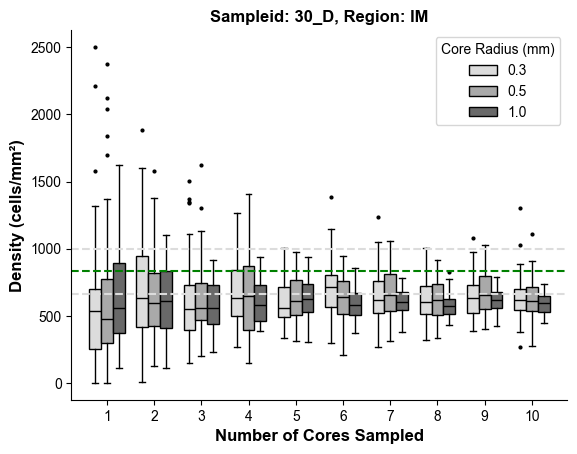

In [25]:
offset = 0.25
width = 0.25

positions = np.arange(1, 11)

for sampleid in sampleids:

    plt.cla()
    plt.clf()

    data_600 = [im_600[(im_600["sampleid"] == sampleid) & (im_600["n_sampled"] == n)]["density_mean"].values for n in positions]

    data_1000 = [im_1000[(im_1000["sampleid"] == sampleid) & (im_1000["n_sampled"] == n)]["density_mean"].values for n in positions]

    data_2000 = [im_2000[(im_2000["sampleid"] == sampleid) & (im_2000["n_sampled"] == n)]["density_mean"].values for n in positions]


    plt.boxplot(data_600, positions=[p - offset for p in positions], widths=width, label=0.3, flierprops=dict(marker="o", markerfacecolor="black", markersize=2, linestyle="none"), patch_artist=True, boxprops=dict(facecolor="gainsboro"), medianprops=dict(color="black"))

    plt.boxplot(data_1000, positions=positions, widths=width, label=0.5, flierprops=dict(marker="o", markerfacecolor="black", markersize=2, linestyle="none"), patch_artist=True, boxprops=dict(facecolor="darkgrey"), medianprops=dict(color="black"))

    plt.boxplot(data_2000, positions=[p + offset for p in positions], widths=width, label=1.0, flierprops=dict(marker="o", markerfacecolor="black", markersize=2, linestyle="none"), patch_artist=True, boxprops=dict(facecolor="dimgrey"), medianprops=dict(color="black"))

    plt.xticks(positions, positions, fontsize=10, fontname="Arial")
    plt.yticks(fontsize=10, fontname="Arial")

    plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
    plt.ylabel("Density (cells/mm\u00b2)", fontdict=font_dict)

    ws_mean = ws[(ws["sampleid"] == sampleid) & (ws["region"] == "outer_IM")]["ws_density"].values[0]
    
    plt.axhline(ws_mean, color="green", linestyle="--")
    plt.axhline(ws_mean * 0.8, color="gainsboro", linestyle="--")
    plt.axhline(ws_mean * 1.2, color="gainsboro", linestyle="--")

    plt.legend(title="Core Radius (mm)", prop={"size": 10, "family": "Arial"}, title_fontproperties={"size": 10, "family": "Arial"})

    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    plt.title(f"Sampleid: {sampleid}, Region: IM", fontdict=font_dict)

    plt.savefig(f"../../../../Data/Plots/Density/PerSampleBox/{sampleid}_IM_denerror.png", dpi=300, transparent=True)

## Heatmaps

In [ ]:
# Consider 1 - R2 for error metric

### Densities

In [26]:
def get_r2(group):
    r, p_value = spearmanr(group["density_mean"], group["ws_density"])
    return r ** 2

In [27]:
r2_tum = tma_total[tma_total["region"] == "tumour"].groupby(["core_radius", "n_sampled"]).apply(get_r2).reset_index(name="r2")

r2_im = tma_total[tma_total["region"] == "outer_IM"].groupby(["core_radius", "n_sampled"]).apply(get_r2).reset_index(name="r2")

C:\Users\Michael\AppData\Local\Temp\ipykernel_38032\2359807499.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  r2_tum = tma_total[tma_total["region"] == "tumour"].groupby(["core_radius", "n_sampled"]).apply(get_r2).reset_index(name="r2")
C:\Users\Michael\AppData\Local\Temp\ipykernel_38032\2359807499.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  r2_im = tma_total[tma_total["region"] == "outer_IM"].

In [28]:
heatmap_tum = r2_tum.pivot(index="core_radius", columns="n_sampled", values="r2")
heatmap_im = r2_im.pivot(index="core_radius", columns="n_sampled", values="r2")

C:\Users\Michael\AppData\Local\Temp\ipykernel_38032\1207396657.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontname="Arial")


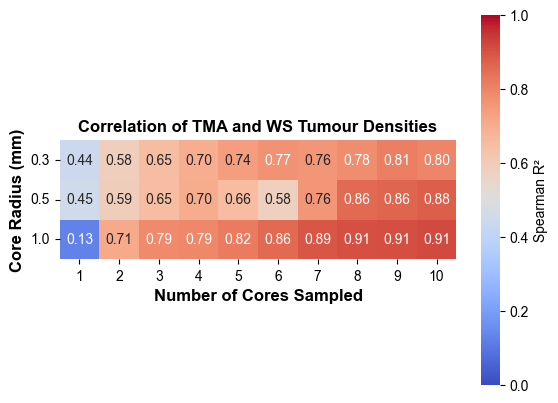

In [29]:
sns.heatmap(heatmap_tum, cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={"label": "Spearman R\u00b2"}, annot_kws={"fontsize": 10, "fontname": "Arial"}, vmin=0, vmax=1.0, square=True)

cbar = plt.gca().collections[0].colorbar
cbar.set_label("Spearman R\u00b2", fontdict={"fontname": "Arial", "fontsize": 10})
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontname="Arial")

plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
plt.ylabel("Core Radius (mm)", fontdict=font_dict)

plt.xticks(fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

plt.gca().set_yticklabels(plt.gca().get_yticklabels(), rotation=0)

plt.title("Correlation of TMA and WS Tumour Densities", fontdict=font_dict)

plt.savefig("../../../../Data/Plots/Heatmaps/den_tumour_r2.png", dpi=300, transparent=True)

C:\Users\Michael\AppData\Local\Temp\ipykernel_38032\2771031445.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontname="Arial")


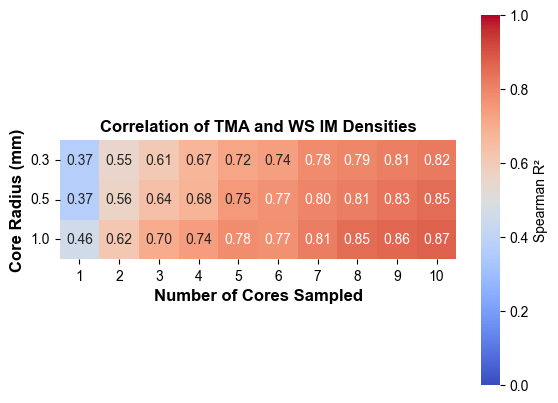

In [30]:
sns.heatmap(heatmap_im, cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={"label": "Spearman R\u00b2"}, annot_kws={"fontsize": 10, "fontname": "Arial"}, vmin=0, vmax=1.0, square=True)

cbar = plt.gca().collections[0].colorbar
cbar.set_label("Spearman R\u00b2", fontdict={"fontname": "Arial", "fontsize": 10})
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontname="Arial")

plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
plt.ylabel("Core Radius (mm)", fontdict=font_dict)

plt.xticks(fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

plt.gca().set_yticklabels(plt.gca().get_yticklabels(), rotation=0)

plt.title("Correlation of TMA and WS IM Densities", fontdict=font_dict)

plt.savefig("../../../../Data/Plots/Heatmaps/den_IM_r2.png", dpi=300, transparent=True)

### Nearest Neighbour Distances

In [31]:
def get_nn_r2(group):
    r, p_value = spearmanr(group["nearest_neighbour_mean"], group["ws_n_neighbour"])
    return r ** 2

In [33]:
tma_heatmap = tma_total.dropna(subset=["nearest_neighbour_mean", "ws_n_neighbour"]).reset_index(drop=True)

r2_tum = tma_heatmap[tma_heatmap["region"] == "tumour"].groupby(["core_radius", "n_sampled"]).apply(get_nn_r2).reset_index(name="r2")

r2_im = tma_heatmap[tma_heatmap["region"] == "outer_IM"].groupby(["core_radius", "n_sampled"]).apply(get_nn_r2).reset_index(name="r2")

C:\Users\Michael\AppData\Local\Temp\ipykernel_38032\1358599453.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  r2_tum = tma_heatmap[tma_heatmap["region"] == "tumour"].groupby(["core_radius", "n_sampled"]).apply(get_nn_r2).reset_index(name="r2")
C:\Users\Michael\AppData\Local\Temp\ipykernel_38032\1358599453.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  r2_im = tma_heatmap[tma_heatmap["region"] == "

In [34]:
heatmap_tum = r2_tum.pivot(index="core_radius", columns="n_sampled", values="r2")
heatmap_im = r2_im.pivot(index="core_radius", columns="n_sampled", values="r2")

C:\Users\Michael\AppData\Local\Temp\ipykernel_38032\3353926816.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontname="Arial")


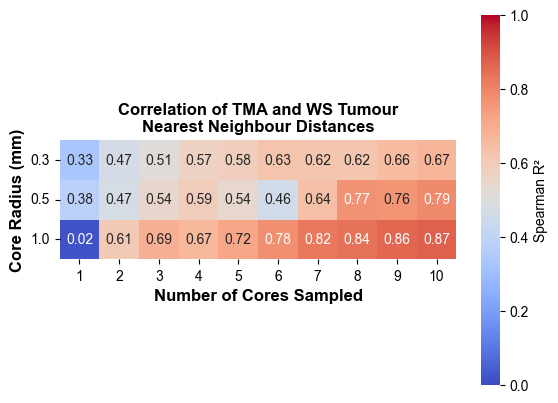

In [35]:
sns.heatmap(heatmap_tum, cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={"label": "Spearman R\u00b2"}, annot_kws={"fontsize": 10, "fontname": "Arial"}, vmin=0, vmax=1.0, square=True)

cbar = plt.gca().collections[0].colorbar
cbar.set_label("Spearman R\u00b2", fontdict={"fontname": "Arial", "fontsize": 10})
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontname="Arial")

plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
plt.ylabel("Core Radius (mm)", fontdict=font_dict)

plt.xticks(fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

plt.gca().set_yticklabels(plt.gca().get_yticklabels(), rotation=0)

plt.title("Correlation of TMA and WS Tumour\nNearest Neighbour Distances", fontdict=font_dict)

plt.savefig("../../../../Data/Plots/Heatmaps/NN_tumour_r2.png", dpi=300, transparent=True)

C:\Users\Michael\AppData\Local\Temp\ipykernel_38032\3726441579.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontname="Arial")


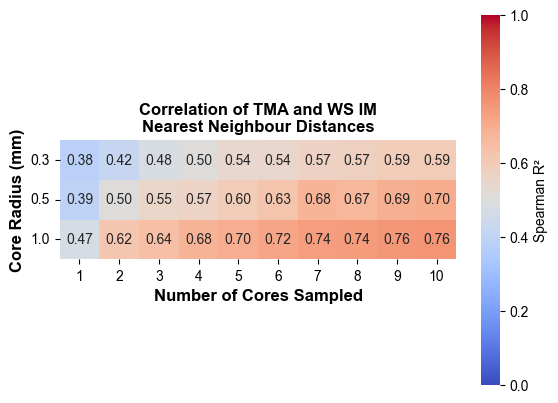

In [36]:
sns.heatmap(heatmap_im, cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={"label": "Spearman R\u00b2"}, annot_kws={"fontsize": 10, "fontname": "Arial"}, vmin=0, vmax=1.0, square=True)

cbar = plt.gca().collections[0].colorbar
cbar.set_label("Spearman R\u00b2", fontdict={"fontname": "Arial", "fontsize": 10})
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontname="Arial")

plt.xlabel("Number of Cores Sampled", fontdict=font_dict)
plt.ylabel("Core Radius (mm)", fontdict=font_dict)

plt.xticks(fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

plt.gca().set_yticklabels(plt.gca().get_yticklabels(), rotation=0)

plt.title("Correlation of TMA and WS IM\nNearest Neighbour Distances", fontdict=font_dict)

plt.savefig("../../../../Data/Plots/Heatmaps/NN_IM_r2.png", dpi=300, transparent=True)